In [1]:
!pip install osmnx geopandas shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import shape
import os
import matplotlib.pyplot as plt

In [2]:
#I want to get the green areas of the 10 biggest Latin American cities (according to World Population Review: 
# https://www.statista.com/statistics/1374285/largest-metropolitan-areas-in-latam/)

#I'll start with Sao Paulo

In [9]:
place_name_1 = "Sao Paulo, Sao Paulo, Brasil"

In [11]:
# Get place boundary related to the place name as a geodataframe
area_1 = ox.geocode_to_gdf(place_name_1)
area_1

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-46.82627 -23.40887, -46.82623 -23.4...",-46.826269,-24.0079,-46.36509,-23.357755,8306946,relation,298285,-23.550651,-46.633382,boundary,administrative,16,0.744652,municipality,São Paulo,"São Paulo, Região Imediata de São Paulo, Regiã..."


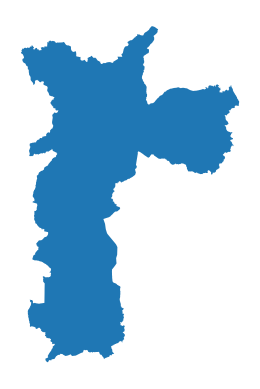

In [12]:
#Plotting the city to double check it with OSM

area_1.plot();
plt.axis('off');

In [23]:
#Now trying to get the green areas
#List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass', "landuse": "forest"}

In [24]:
# Get the data
green_sao = ox.features_from_place(place_name_1, tags)

# Check the result
print("Retrieved", len(green_sao), "objects")

Retrieved 5147 objects


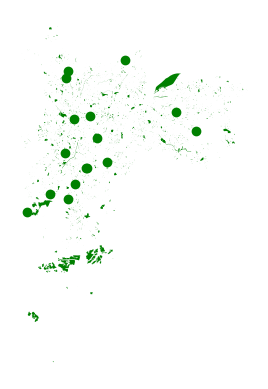

In [28]:
green_sao.plot(color="green");
plt.axis('off');

In [35]:
# Checking geometry types

print(green_sao.geometry.type.unique())

['Point' 'Polygon' 'MultiPolygon' 'LineString']


In [42]:
# To be able to save it as a shapefile all hve to be polygons
# So I'll convert them all and then later double check with govermental shapefile data

green_sao_poly = green_sao[green_sao.geometry.type.isin(["Polygon", "MultiPolygon"])]
print(green_sao_poly.geometry.type.unique())

['Polygon' 'MultiPolygon']


(np.float64(-46.84932817),
 np.float64(-46.34203083),
 np.float64(-24.04040756),
 np.float64(-23.32524784))

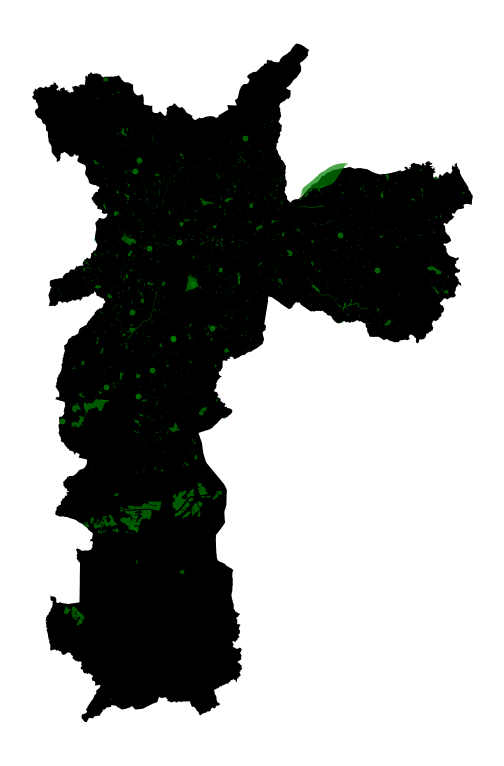

In [37]:
# Some of the areas appearently haven't been mappes out properly and only been pinned. I'll use additional GIS data
# later to double check

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area_1.plot(ax=ax, facecolor='black', zorder=0)

# Plot parks
green_sao_poly.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)

plt.tight_layout()
plt.axis('off')

In [48]:
# Now I'll download it as shapefile file

# Create a simple filename
output_filename = "sao_paulo_green_areas.shp"
desktop_path = os.path.join(os.path.expanduser("~"), "Schreibtisch")  # Full path to Desktop
full_path = os.path.join(desktop_path, output_filename)

# Ensure the directory exists
os.makedirs(desktop_path, exist_ok=True)

green_sao_poly.to_file(full_path)

/var/folders/6b/69fsc09170l8tck24jdn5jfr0000gn/T/ipykernel_41569/940116289.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  green_sao_poly.to_file(full_path)
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:street' to 'addr_stree'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:city' to 'addr_city'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:postcode' to 'addr_postc'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:suburb' to 'addr_subur'
  ogr_write(
/Users/rebeccahabte

In [49]:
# Apparently do to the limitations of Shapefile not all OSM data gets downloaded. The additional government shapefiles 
# should help

In [57]:
# Now I'll do the other cities

cities = [("Mexico City, Mexico"),("Buenos Aires, Argentina"), 
          ("Rio de Janeiro, Brazil"),("Lima, Peru"),("Bogotá, Colombia"),
          ("Santiago, Chile"),("Belo Horizonte, Brazil"),("Guadalajara, Mexico"),
          ("Monterrey, Mexico")]

city_geocodes = {}

for city in cities:
    city_geocodes[city] = ox.geocode_to_gdf(city)
    print(city_geocodes[city])

                                            geometry  bbox_west  bbox_south  \
0  POLYGON ((-99.36492 19.27777, -99.36192 19.275... -99.364924   19.048719   

   bbox_east  bbox_north   place_id  osm_type   osm_id       lat        lon  \
0 -98.940303   19.592757  286222337  relation  1376330  19.43263 -99.133178   

      class            type  place_rank  importance addresstype         name  \
0  boundary  administrative           8    0.884727       state  Mexico City   

          display_name  
0  Mexico City, Mexico  
                                            geometry  bbox_west  bbox_south  \
0  MULTIPOLYGON (((-58.53145 -34.61564, -58.53143... -58.531448  -34.705815   

   bbox_east  bbox_north  place_id  osm_type   osm_id       lat        lon  \
0 -58.335142  -34.526553  16256617  relation  1224652 -34.60837 -58.444058   

      class            type  place_rank  importance addresstype          name  \
0  boundary  administrative          16    0.772258        city  Buenos Ai

Mexico City, Mexico


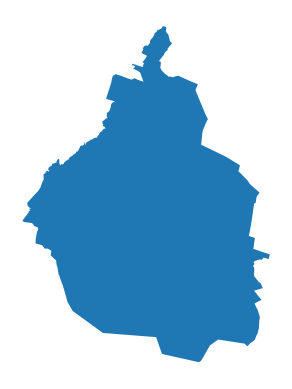

Buenos Aires, Argentina


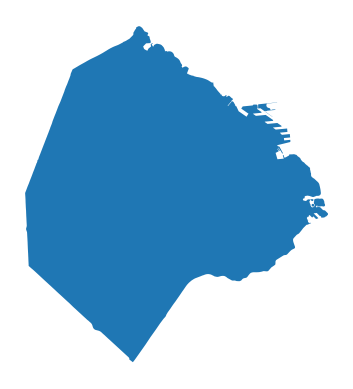

Rio de Janeiro, Brazil


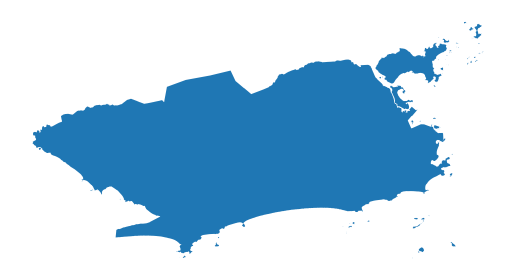

Lima, Peru


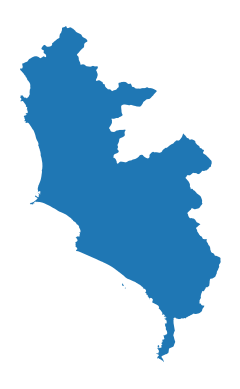

Bogotá, Colombia


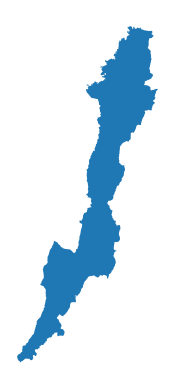

Santiago, Chile


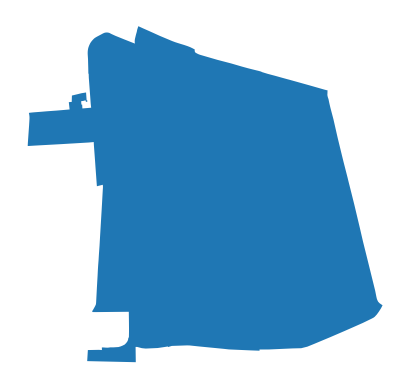

Belo Horizonte, Brazil


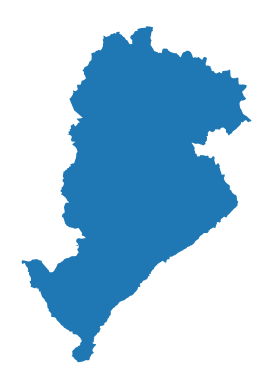

Guadalajara, Mexico


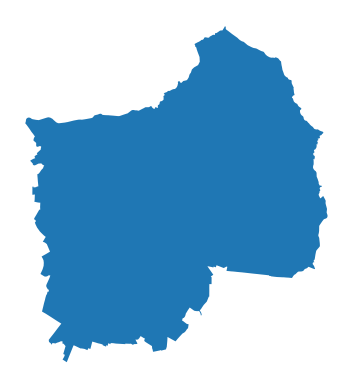

Monterrey, Mexico


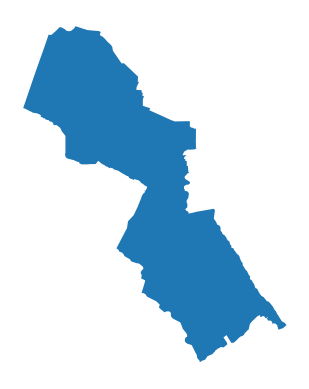

In [66]:
for city in cities:
    print(city)
    city_geocodes[city].plot()
    plt.axis('off')
    plt.show()

In [76]:
# Get the data

green_data_cities = {}

for city in cities:
    green_data_cities[city] = ox.features_from_place(city, tags)

# Check the result
print("Retrieved", len(green_data_cities), "objects")

Retrieved 9 objects


In [69]:
green_data_cities

{'Mexico City, Mexico':                                                              geometry leisure  \
 element id                                                                      
 node    961346859                          POINT (-99.17884 19.34224)    park   
         1634800000                          POINT (-99.1413 19.39787)    park   
         1874776365                         POINT (-99.16303 19.34288)    park   
         2493262736                         POINT (-99.11246 19.40645)    park   
         2716391647                           POINT (-99.192 19.36811)    park   
 ...                                                               ...     ...   
 way     1330783302  POLYGON ((-99.06916 19.38077, -99.06912 19.380...    park   
         1330783303  POLYGON ((-99.06888 19.3823, -99.06883 19.3823...    park   
         1330783306  POLYGON ((-99.07602 19.37058, -99.0764 19.3707...    park   
         1333092049  POLYGON ((-99.15523 19.46786, -99.15516 19.467...    p

Mexico City, Mexico


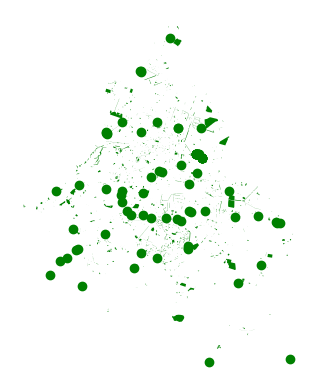

Buenos Aires, Argentina


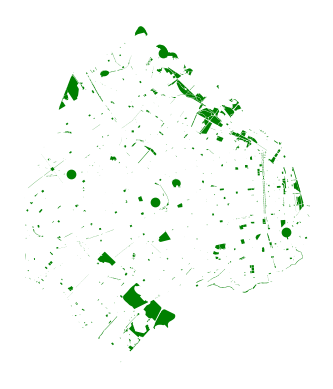

Rio de Janeiro, Brazil


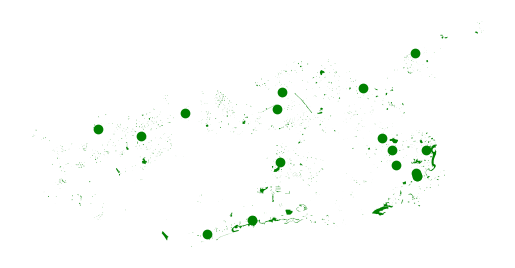

Lima, Peru


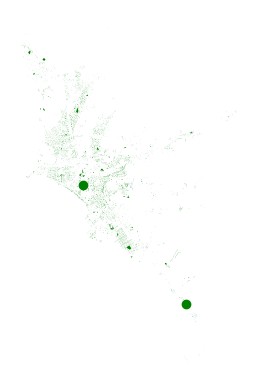

Bogotá, Colombia


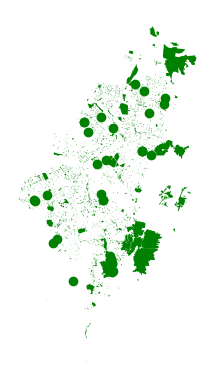

Santiago, Chile


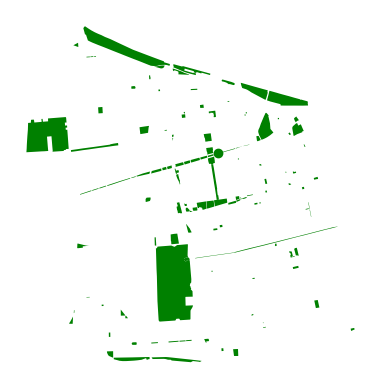

Belo Horizonte, Brazil


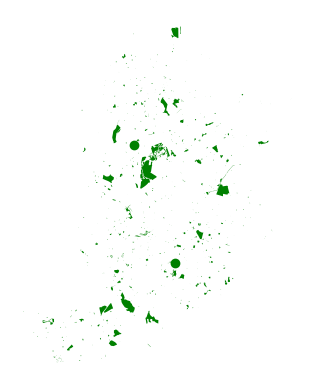

Guadalajara, Mexico


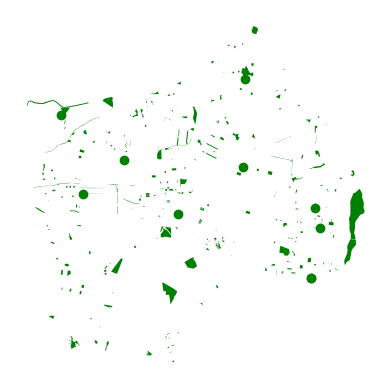

Monterrey, Mexico


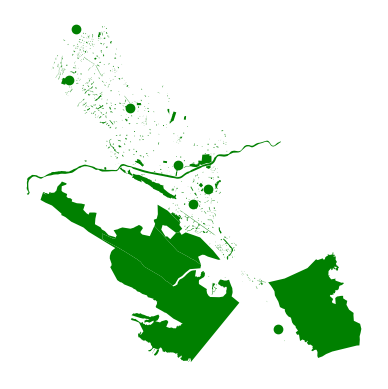

In [78]:
#Now plotting all the green areas

for city in cities:
    print(city)
    gdf = green_data_cities[city]
    gdf.plot(color="green")
    plt.axis('off')
    plt.show()

In [113]:
# To be able to save it as a shapefile all have to be polygons
# Create a new dictionary to store filtered polygons for each city
filtered_green_data = {}

# Loop through cities and filter the geometries
for city in cities:
    gdf = green_data_cities.get(city, None)
    
    if gdf is not None:
        # Filter to keep only polygons and multipolygons
        green_cities_poly = gdf[gdf.geometry.type.isin(["Polygon", "MultiPolygon"])]
        
        # Store the filtered data in the new dictionary with city name as key
        filtered_green_data[city] = green_cities_poly
        
        # Verify the geometry types after filtering
        print(f"{city}: {green_cities_poly.geometry.type.unique()}")
    else:
        print(f"No data found for {city}. Skipping...")

Mexico City, Mexico: ['Polygon' 'MultiPolygon']
Buenos Aires, Argentina: ['MultiPolygon' 'Polygon']
Rio de Janeiro, Brazil: ['Polygon' 'MultiPolygon']
Lima, Peru: ['Polygon' 'MultiPolygon']
Bogotá, Colombia: ['Polygon' 'MultiPolygon']
Santiago, Chile: ['Polygon' 'MultiPolygon']
Belo Horizonte, Brazil: ['Polygon' 'MultiPolygon']
Guadalajara, Mexico: ['Polygon' 'MultiPolygon']
Monterrey, Mexico: ['Polygon' 'MultiPolygon']


Mexico City, Mexico


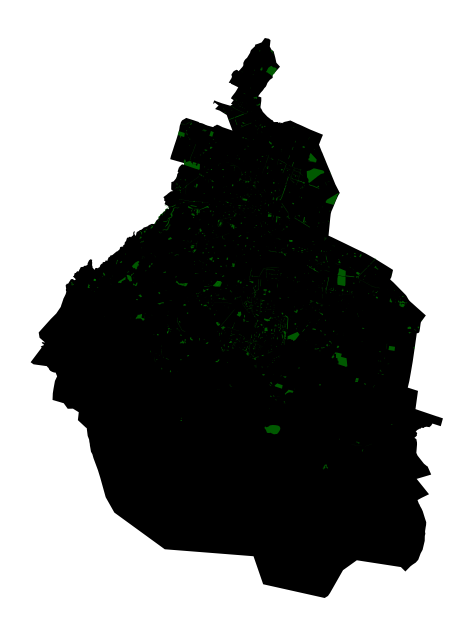

Buenos Aires, Argentina


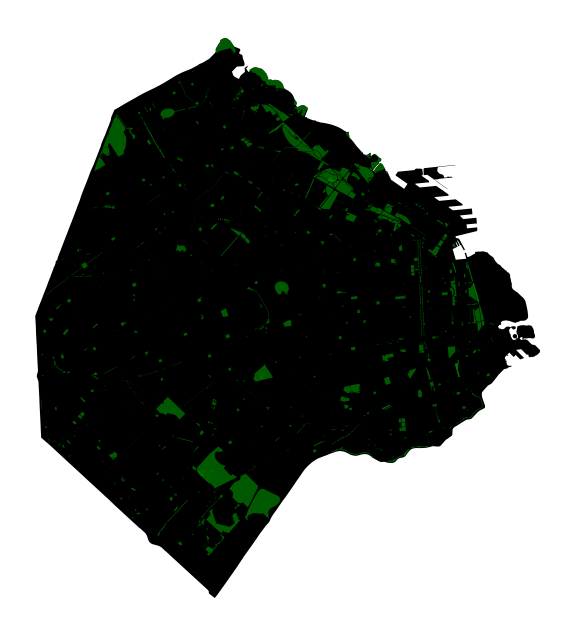

Rio de Janeiro, Brazil


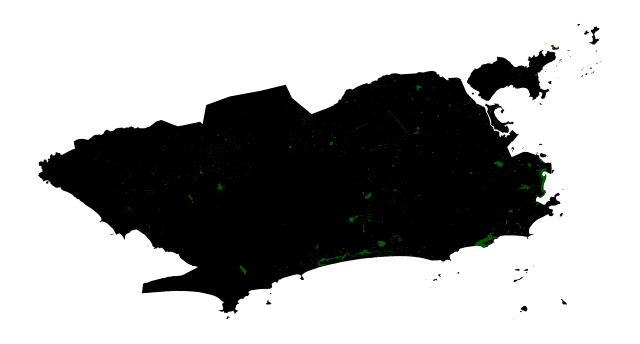

Lima, Peru


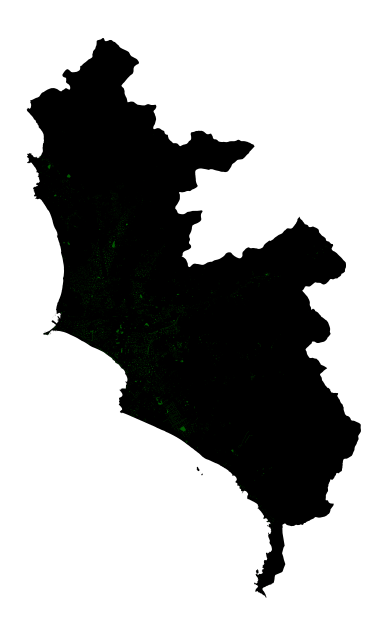

Bogotá, Colombia


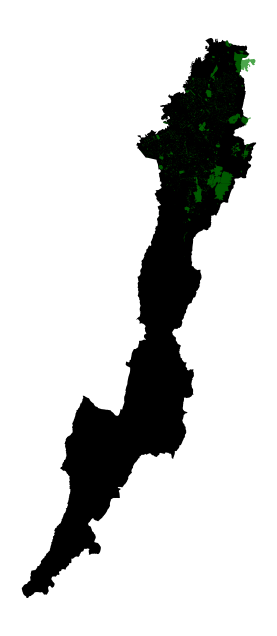

Santiago, Chile


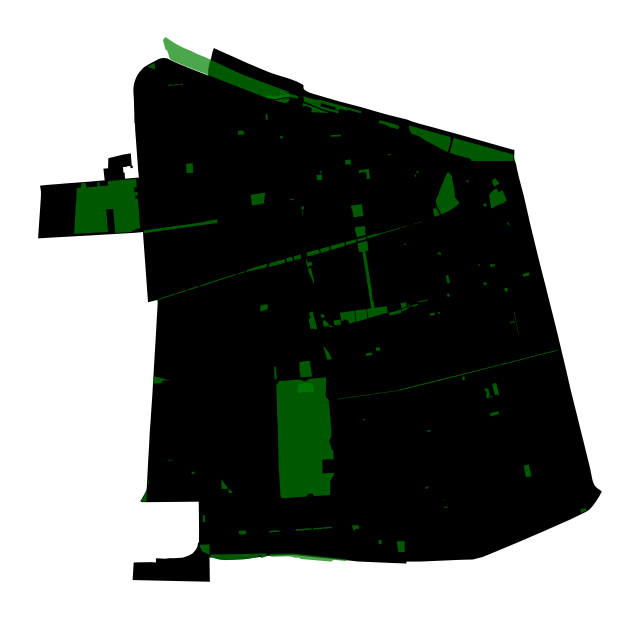

Belo Horizonte, Brazil


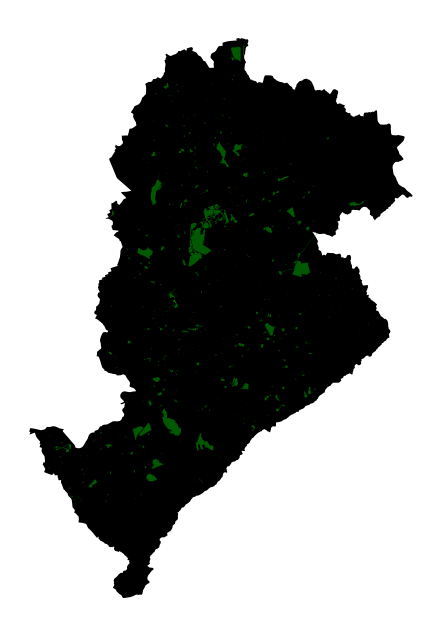

Guadalajara, Mexico


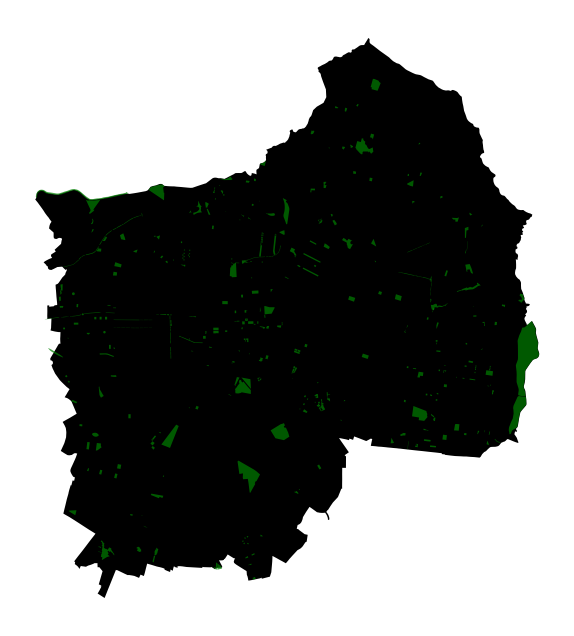

Monterrey, Mexico


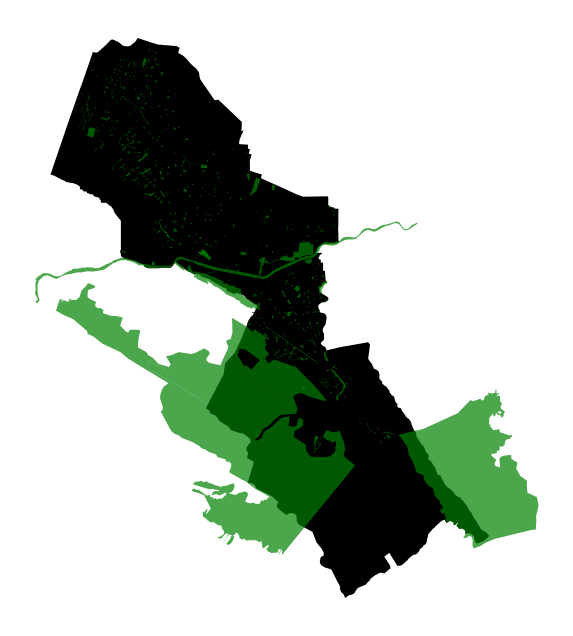

In [116]:
# Now plotting everythink together

for city in cities:
    print(city)
    code = city_geocodes[city]
    gdf = filtered_green_data[city]
    fig, ax = plt.subplots(figsize=(8, 8))
    code.plot(ax=ax, facecolor='black', zorder=0)
    gdf.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)
    plt.axis('off')
    plt.show()

In [123]:
# Now I'll download it as shapefiles

# Create a simple filename
for city in cities:
    output_filename = f"{city}_green_areas.shp"
    desktop_path = os.path.join(os.path.expanduser("~"), "Schreibtisch")  # Full path to Desktop
    full_path = os.path.join(desktop_path, output_filename)
    os.makedirs(desktop_path, exist_ok=True)
    gdf = filtered_green_data[city]
    gdf.to_file(full_path)
    print(f"Saved {city} green areas to {full_path}")

/var/folders/6b/69fsc09170l8tck24jdn5jfr0000gn/T/ipykernel_41569/3085649716.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(full_path)
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'description' to 'descriptio'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:city' to 'addr_city'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:postcode' to 'addr_postc'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:street' to 'addr_stree'
  ogr_write(
/Users/rebeccahabtemariam/.py

Saved Mexico City, Mexico green areas to /Users/rebeccahabtemariam/Schreibtisch/Mexico City, Mexico_green_areas.shp
Saved Buenos Aires, Argentina green areas to /Users/rebeccahabtemariam/Schreibtisch/Buenos Aires, Argentina_green_areas.shp
Saved Rio de Janeiro, Brazil green areas to /Users/rebeccahabtemariam/Schreibtisch/Rio de Janeiro, Brazil_green_areas.shp


/var/folders/6b/69fsc09170l8tck24jdn5jfr0000gn/T/ipykernel_41569/3085649716.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(full_path)
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'operator:type' to 'operator_t'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:city' to 'addr_city'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:housenumber' to 'addr_house'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:neighbourhood' to 'addr_neigh'
  ogr_write(
/Users/rebeccahab

Saved Lima, Peru green areas to /Users/rebeccahabtemariam/Schreibtisch/Lima, Peru_green_areas.shp
Saved Bogotá, Colombia green areas to /Users/rebeccahabtemariam/Schreibtisch/Bogotá, Colombia_green_areas.shp
Saved Santiago, Chile green areas to /Users/rebeccahabtemariam/Schreibtisch/Santiago, Chile_green_areas.shp
Saved Belo Horizonte, Brazil green areas to /Users/rebeccahabtemariam/Schreibtisch/Belo Horizonte, Brazil_green_areas.shp
Saved Guadalajara, Mexico green areas to /Users/rebeccahabtemariam/Schreibtisch/Guadalajara, Mexico_green_areas.shp
Saved Monterrey, Mexico green areas to /Users/rebeccahabtemariam/Schreibtisch/Monterrey, Mexico_green_areas.shp


/var/folders/6b/69fsc09170l8tck24jdn5jfr0000gn/T/ipykernel_41569/3085649716.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(full_path)
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:city' to 'addr_city'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:street' to 'addr_stree'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'opening_hours' to 'opening_ho'
  ogr_write(
/Users/rebeccahabtemariam/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:housenumber' to 'addr_house'
  ogr_write(
/Users/rebeccahabtemaria